In [1]:
# reading files
import pandas as pd

# specify path of the data
path_train = './dataset/wider_face_split/wider_face_train_bbx_gt.txt'
path_val = './dataset/wider_face_split/wider_face_val_bbx_gt.txt'

# reading data
train = pd.read_csv(path_train,header=None)
val = pd.read_csv(path_val,header=None)

In [2]:
# pre-processing data
# this function accepts the dataframe and returns modified dataframe
def reformat(df):
  # fetch values of first column
  values = df[0].values
  # creating empty lists
  names=[]
  num_faces=[]
  bbox=[]
  # fetch values into corresponding lists
  for i in range(len(values)):
      
      # if an image
      if ".jpg" in values[i]:
        
        # no. of faces
        num=int(values[i+1])
        
        # append image name to list
        names.append(values[i])
        
        # append no. of faces to list
        num_faces.append(num)
        
        # create bbox list
        box=[]
        for j in range(i+2,i+2+num):
          box.append(values[j])
        
        # append bbox list to list
        bbox.append(box)
  
  return pd.DataFrame({'name':names,'num_faces':num_faces,'bbox':bbox})

In [3]:
# pre-processing the data 
train = reformat(train)
val = reformat(val)

In [4]:
# first 5 rows of the pre-processed data
train.head()

,name,num_faces,bbox
0,0--Parade/0_Parade_marchingband_1_849.jpg,1,[449 330 122 149 0 0 0 0 0 0 ]
1,0--Parade/0_Parade_Parade_0_904.jpg,1,[361 98 263 339 0 0 0 0 0 0 ]
2,0--Parade/0_Parade_marchingband_1_799.jpg,21,"[78 221 7 8 2 0 0 0 0 0 , 78 238 14 17 2 0 0 0..."
3,0--Parade/0_Parade_marchingband_1_117.jpg,9,"[69 359 50 36 1 0 0 0 0 1 , 227 382 56 43 1 0 ..."
4,0--Parade/0_Parade_marchingband_1_778.jpg,35,"[27 226 33 36 1 0 0 0 2 0 , 63 95 16 19 2 0 0 ..."


In [5]:
# shape of the training data
train.shape


(12880, 3)

In [6]:
# shape of validation data
val.shape

(3226, 3)

In [7]:
# adding full path
train['name'] = train['name'].apply(lambda x: 'WIDER_train/images/'+x )
val['name']   = val['name'].apply(lambda x: 'WIDER_val/images/'+x )

In [8]:
# first 5 rows
train.head()

,name,num_faces,bbox
0,WIDER_train/images/0--Parade/0_Parade_marching...,1,[449 330 122 149 0 0 0 0 0 0 ]
1,WIDER_train/images/0--Parade/0_Parade_Parade_0...,1,[361 98 263 339 0 0 0 0 0 0 ]
2,WIDER_train/images/0--Parade/0_Parade_marching...,21,"[78 221 7 8 2 0 0 0 0 0 , 78 238 14 17 2 0 0 0..."
3,WIDER_train/images/0--Parade/0_Parade_marching...,9,"[69 359 50 36 1 0 0 0 0 1 , 227 382 56 43 1 0 ..."
4,WIDER_train/images/0--Parade/0_Parade_marching...,35,"[27 226 33 36 1 0 0 0 2 0 , 63 95 16 19 2 0 0 ..."


In [9]:
# converting bbox to floating point
import numpy as np
train['bbox'] = train['bbox'].apply(lambda row:[ np.float_(annos.split()) for annos in row] )
val['bbox']   = val['bbox'].apply(lambda row:[ np.float_(annos.split()) for annos in row] )

In [10]:
# first 5 rows
train.head()

,name,num_faces,bbox
0,WIDER_train/images/0--Parade/0_Parade_marching...,1,"[[449.0, 330.0, 122.0, 149.0, 0.0, 0.0, 0.0, 0..."
1,WIDER_train/images/0--Parade/0_Parade_Parade_0...,1,"[[361.0, 98.0, 263.0, 339.0, 0.0, 0.0, 0.0, 0...."
2,WIDER_train/images/0--Parade/0_Parade_marching...,21,"[[78.0, 221.0, 7.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0..."
3,WIDER_train/images/0--Parade/0_Parade_marching...,9,"[[69.0, 359.0, 50.0, 36.0, 1.0, 0.0, 0.0, 0.0,..."
4,WIDER_train/images/0--Parade/0_Parade_marching...,35,"[[27.0, 226.0, 33.0, 36.0, 1.0, 0.0, 0.0, 0.0,..."


In [11]:
# extracting class names
train['class']= train['name'].apply(lambda x:x.split("/")[2].split("--")[1])
val['class']  = val['name'].apply(lambda x:x.split("/")[2].split("--")[1])
# first 5 rows
train.head()

,name,num_faces,bbox,class
0,WIDER_train/images/0--Parade/0_Parade_marching...,1,"[[449.0, 330.0, 122.0, 149.0, 0.0, 0.0, 0.0, 0...",Parade
1,WIDER_train/images/0--Parade/0_Parade_Parade_0...,1,"[[361.0, 98.0, 263.0, 339.0, 0.0, 0.0, 0.0, 0....",Parade
2,WIDER_train/images/0--Parade/0_Parade_marching...,21,"[[78.0, 221.0, 7.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0...",Parade
3,WIDER_train/images/0--Parade/0_Parade_marching...,9,"[[69.0, 359.0, 50.0, 36.0, 1.0, 0.0, 0.0, 0.0,...",Parade
4,WIDER_train/images/0--Parade/0_Parade_marching...,35,"[[27.0, 226.0, 33.0, 36.0, 1.0, 0.0, 0.0, 0.0,...",Parade


In [12]:
# reading class names
easy_df = pd.read_csv('./dataset/class.txt',header=None)
easy_labels = easy_df[0].values
# easy labels
easy_labels

array(['Parade', 'Handshaking', 'People_Marching', 'Meeting', 'Group',
       'Interview', 'Traffic', 'Stock_Market', 'Award_Ceremony',
       'Ceremony', 'Concerts', 'Couple', 'Demonstration', 'Family_Group',
       'Festival', 'Picnic', 'Shoppers', 'Soldier_Firing',
       'Soldier_Patrol', 'Soldier_Drilling', 'Spa', 'Sports_Fan',
       'Students_Schoolkids', 'Riot', 'Surgeons', 'Waiter_Waitress',
       'Worker_Laborer', 'Running', 'Baseball', 'Basketball', 'Football',
       'Soccer', 'Tennis', 'Ice_Skating', 'Dancing', 'Gymnastics',
       'Swimming', 'Car_Racing', 'Row_Boat', 'Aerobics', 'Balloonist',
       'Jockey', 'Matador_Bullfighter', 'Parachutist_Paratrooper',
       'Greeting', 'Car_Accident', 'Celebration_Or_Party', 'Dresses',
       'Photographers', 'Raid', 'Rescue', 'Sports_Coach_Trainer', 'Voter',
       'Angler', 'Hockey', 'people', 'Funeral', 'Street_Battle',
       'Cheering', 'Election_Campain', 'Press_Conference'], dtype=object)

In [13]:
# creating empty dataframes
train_df, val_df= pd.DataFrame(), pd.DataFrame()
# fetching rows of easy classes only
for i in easy_labels:
  train_df = pd.concat( [train_df, train[train['class']==i]] )
  val_df   = pd.concat( [val_df, val[val['class']==i]] )

In [14]:
# custom annotation format
idx=0
values = train_df.values[idx]
print(values)

['WIDER_train/images/0--Parade/0_Parade_marchingband_1_849.jpg' 1
 list([array([449., 330., 122., 149.,   0.,   0.,   0.,   0.,   0.,   0.])])
 'Parade']


In [15]:
# for dealing with images
import cv2
# create annotation dict 
record = {}
# image name        
filename = values[0]
# height and width of an image

height, width = cv2.imread("./dataset/"+filename).shape[:2]
# creating fields    
record["file_name"] = filename
record["image_id"] = 0
record["height"] = height
record["width"] = width
# different ways to represent bounding box
from detectron2.structures import BoxMode
# create bbox list
objs = []
  
# for every face in an image
for i in range(len(values[2])):
  
  # fetch bbox coordinates
  annos = values[2][i]
  # unpack values
  x1, y1, w, h = annos[0], annos[1], annos[2], annos[3]
  
  # find bottom right corner
  x2, y2 = x1 + w, y1 + h
  
  # create bbox dict
  obj = {       "bbox": [x1, y1, x2, y2],
                "bbox_mode": BoxMode.XYXY_ABS,
                "category_id": 0,  
                "iscrowd": 0
        }
  # append bbox dict to bbox list
  objs.append(obj)

# assigning bbox list to annotation dict
record["annotations"] = objs
# standard annotation format
record

{'file_name': 'WIDER_train/images/0--Parade/0_Parade_marchingband_1_849.jpg',
 'image_id': 0,
 'height': 1385,
 'width': 1024,
 'annotations': [{'bbox': [449.0, 330.0, 571.0, 479.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0,
   'iscrowd': 0}]}

In [16]:
def create_annotation(df):  
  
  # create list to store annotation dict
  dataset_dicts = []
  # for each image 
  for idx, v in enumerate(df.values):
    
    # create annotation dict 
    record = {}
    # image name        
    filename = "./dataset/"+v[0]
    # height and width of an image
    height, width = cv2.imread(filename).shape[:2]
    # assign values to fields    
    record["file_name"] = filename
    record["image_id"] = idx
    record["height"] = height
    record["width"] = width
    # create list for bbox
    objs = []
    for i in range(len(v[2])):
      # bounding box coordinates
      annos = v[2][i]
      
      # unpack values
      x1, y1, w, h = annos[0], annos[1], annos[2], annos[3]
      
      # find bottom right corner
      x2, y2 = x1 + w, y1 + h
      
      # create bbox dict
      obj = {   "bbox": [x1, y1, x2, y2],
                "bbox_mode": BoxMode.XYXY_ABS,
                "category_id": 0,
                "iscrowd": 0
            }
      # append bbox dict to a bbox list      
      objs.append(obj)
    
    # assign bbox list to annotation dict
    record["annotations"] = objs
    # append annotation dict to list
    dataset_dicts.append(record)
  
  return dataset_dicts

# create standard annotations for training and validation datasets
train_annotation = create_annotation(train_df)
val_annotation = create_annotation(val_df)

# standard annotation of an image
train_annotation[0]

{'file_name': './dataset/WIDER_train/images/0--Parade/0_Parade_marchingband_1_849.jpg',
 'image_id': 0,
 'height': 1385,
 'width': 1024,
 'annotations': [{'bbox': [449.0, 330.0, 571.0, 479.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0,
   'iscrowd': 0}]}

In [17]:
from detectron2.data import DatasetCatalog, MetadataCatalog
# register dataset
DatasetCatalog.register("face_train", lambda d="train": create_annotation(train_df))

In [18]:
# register metadata
MetadataCatalog.get("face_train").set(thing_classes=["face"])

namespace(name='face_train', thing_classes=['face'])

In [19]:
# for drawing bounding boxes on images
from detectron2.utils.visualizer import Visualizer
# for randomly selecting images
import random
# get the name of the classes
face_metadata = MetadataCatalog.get("face_train")
print(face_metadata)

Metadata(name='face_train', thing_classes=['face'])


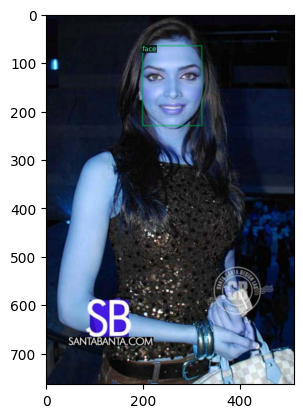

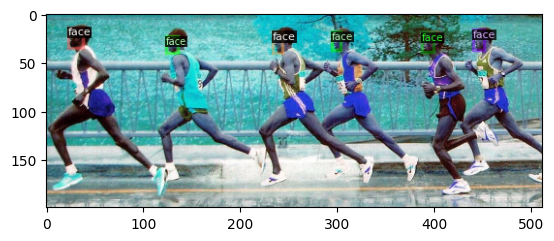

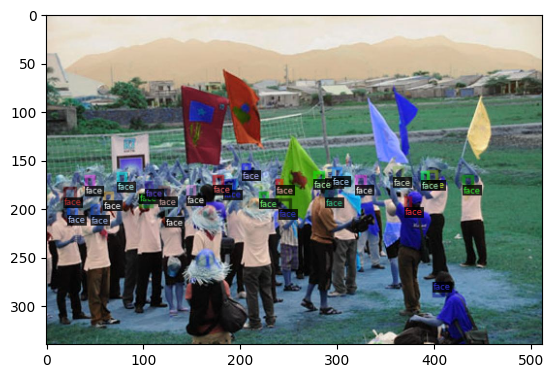

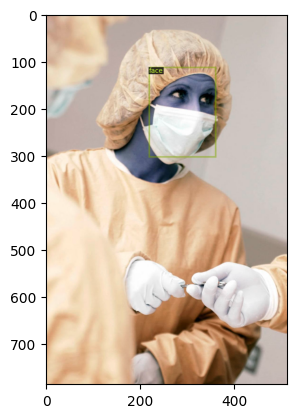

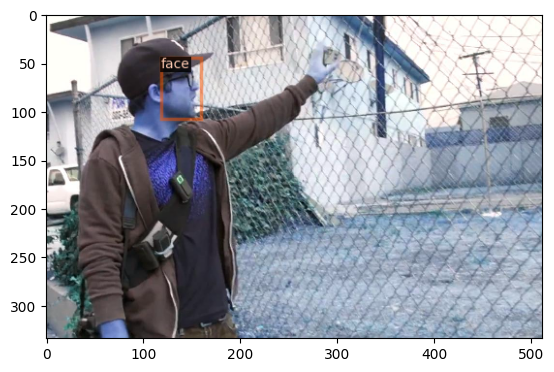

In [20]:
import cv2
import matplotlib.pyplot as plt

# randomly select images
for d in random.sample(train_annotation, 5):
  
  # read an image
  img = cv2.imread(d["file_name"])
  # create visualizer
  visualizer = Visualizer(img[:, :, ::-1], metadata=face_metadata, scale=0.5)
  
  # draw bounding box on image
  vis = visualizer.draw_dataset_dict(d)
  
  plt.imshow(vis.get_image()[:, :, ::-1])
  plt.show()

In [21]:
# to obtain pretrained models
from detectron2 import model_zoo
# to train the model
from detectron2.engine import DefaultTrainer
# set up the config
from detectron2.config import get_cfg
# interact with os
import os
import argparse
from detectron2.engine import default_argument_parser

# define configure instance
cfg = get_cfg()
# Get a model specified by relative path under Detectron2’s official configs/ directory.
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))

# load pretrained weights
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/fast_rcnn_R_50_FPN_1x.yaml")
# set learning rate
cfg.SOLVER.BASE_LR = 0.00015
cfg.SOLVER.IMS_PER_BATCH = 16
cfg.SOLVER.MAX_ITER = 20000


In [22]:
#check number of gpu I am using
!nvidia-smi

Fri Dec  1 14:17:29 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:01:00.0 Off |                  Off |
|  0%   27C    P8              18W / 450W |  23743MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [23]:
# List of the dataset names for training. Must be registered in DatasetCatalog
cfg.DATASETS.TRAIN = ("face_train",)
cfg.DATASETS.TEST = ()

In [24]:
from detectron2.engine import launch
# create directory to save weights
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# create a trainer with given config
trainer = DefaultTrainer(cfg)
# If resume==True, and last checkpoint exists, resume from it, load all checkpointables (eg. optimizer and scheduler) and update iteration counter.
# Otherwise, load the model specified by the config (skip all checkpointables) and start from the first iteration.
trainer.resume_or_load(resume=False)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 23.65 GiB total capacity; 72.82 MiB already allocated; 6.50 MiB free; 80.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
from detectron2.engine import launch
import argparse

trainer.train(),

[12/01 04:19:58 d2.engine.train_loop]: Starting training from iteration 0


/root/miniconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/01 04:20:15 d2.utils.events]:  eta: 2:06:56  iter: 19  total_loss: 1.106  loss_cls: 0.137  loss_box_reg: 0.04989  loss_rpn_cls: 0.6979  loss_rpn_loc: 0.2218    time: 0.7620  last_time: 0.7855  data_time: 0.1243  last_data_time: 0.1210   lr: 4.9953e-06  max_mem: 15624M
[12/01 04:20:30 d2.utils.events]:  eta: 2:05:32  iter: 39  total_loss: 1.168  loss_cls: 0.1608  loss_box_reg: 0.06095  loss_rpn_cls: 0.6959  loss_rpn_loc: 0.2426    time: 0.7566  last_time: 0.7138  data_time: 0.0951  last_data_time: 0.0493   lr: 9.9902e-06  max_mem: 15868M
[12/01 04:20:45 d2.utils.events]:  eta: 2:04:42  iter: 59  total_loss: 1.109  loss_cls: 0.1588  loss_box_reg: 0.05848  loss_rpn_cls: 0.6909  loss_rpn_loc: 0.2015    time: 0.7524  last_time: 0.8703  data_time: 0.0993  last_data_time: 0.2106   lr: 1.4985e-05  max_mem: 15868M
[12/01 04:21:00 d2.utils.events]:  eta: 2:04:34  iter: 79  total_loss: 1.171  loss_cls: 0.1583  loss_box_reg: 0.06667  loss_rpn_cls: 0.6835  loss_rpn_loc: 0.2479    time: 0.7539  

(None,)

### Evaluate Model


In [ ]:
# register validation dataset
DatasetCatalog.register("face_val", lambda d="val": create_annotation(val_df))
# register metadata
MetadataCatalog.get("face_val").set(thing_classes=["face"])

namespace(name='face_val', thing_classes=['face'])

In [ ]:
# load the final weights
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# set the testing threshold for this model
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.8
# List of the dataset names for validation. Must be registered in DatasetCatalog
cfg.DATASETS.TEST = ("face_val", )

In [ ]:
# set up predictor
from detectron2.engine import DefaultPredictor
# Create a simple end-to-end predictor with the given config that runs on single device for a single input image.
predictor = DefaultPredictor(cfg)

[12/01 06:27:53 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


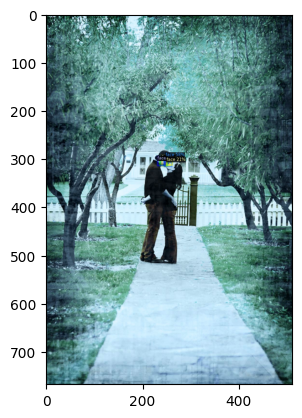

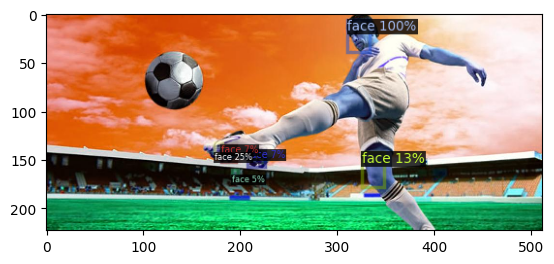

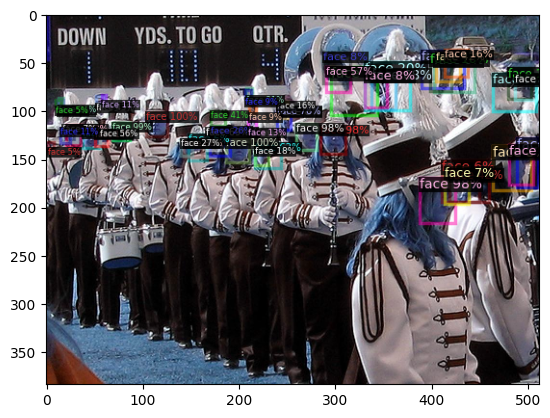

In [ ]:
# create standard annotations for validation data
dataset_dicts = create_annotation(val_df)
# randomly select images
for d in random.sample(dataset_dicts, 3):    
    
    # read an image
    im = cv2.imread(d["file_name"])
    
    # make predictions
    outputs = predictor(im)
    
    # create visualizer
    v = Visualizer(im[:, :, ::-1], metadata=face_metadata, scale=0.5)
    
    # draw predictions on the image
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()


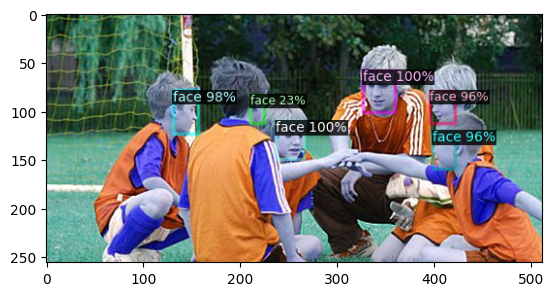

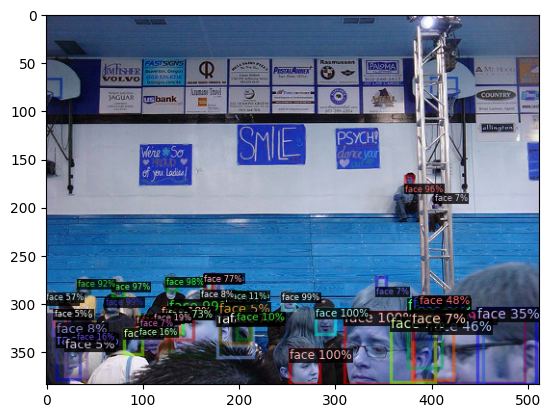

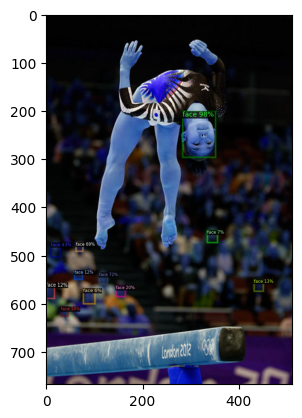

In [ ]:
# randomly select images
for d in random.sample(dataset_dicts, 3):    
    
    # read an image
    im = cv2.imread(d["file_name"])
    
    # make predictions
    outputs = predictor(im)
    
    # create visualizer
    v = Visualizer(im[:, :, ::-1], metadata=face_metadata, scale=0.5)
    
    # draw predictions on the image
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
# create a evaluator using COCO metrics
evaluator = COCOEvaluator("face_val", cfg, False, output_dir="./output/")
# create a loader for test data
val_loader = build_detection_test_loader(cfg, "face_val")
# runs the model on each image in the test data and produces the results
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [12/01 06:42:30 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[12/01 06:42:30 d2.evaluation.coco_evaluation]: Trying to convert 'face_val' to COCO format ...
[12/01 06:42:30 d2.data.datasets.coco]: Converting annotations of dataset 'face_val' to COCO format ...)
[12/01 06:42:54 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[12/01 06:42:58 d2.data.datasets.coco]: Conversion finished, #images: 3226, #annotations: 39708
[12/01 06:42:58 d2.data.datasets.coco]: Caching COCO format annotations at './output/face_val_coco_format.json' ...
[12/01 06:43:23 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    face    | 39708        |
|            |              |
[12/01 06:43:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800,

OrderedDict([('bbox',
              {'AP': 28.586575790804357,
               'AP50': 55.467000426738736,
               'AP75': 27.063304784924174,
               'APs': 17.33320345515203,
               'APm': 53.985987821449186,
               'APl': 63.38419374678713})])